In [35]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
# import the various libraries

In [36]:
from sklearn.datasets import fetch_california_housing
# loading the datasets from sklearn 

In [11]:
 housing = fetch_california_housing()
# fetching the dataset from california_housing

In [12]:
housing
# loading housing dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
housing.keys()
# looking for the keys in the datasets

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [14]:
housing.data
# loading the input datasets 

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [15]:
housing.target
# loading the labels

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [16]:
housing.feature_names
# loading the feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [17]:
housing.DESCR
# loading the housing description

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [19]:
house=pd.DataFrame(housing.data,columns=housing.feature_names)
# loading the housing dataset into pandas DataFrame as house

In [20]:
house
# calling the house DataFrame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [21]:
house.shape
# looking for the number of rows and columns in the dataset

(20640, 8)

In [23]:
house['target']=housing.target
# Adding the target column into the dataset

In [24]:
house.columns
# Looking for the number of columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

In [25]:
house
# loading the house DataFrame to see if the target Column has been added

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [26]:
house.shape
# looking for the number of rows and columns

(20640, 9)

In [27]:
house.dtypes
# looking out for the datatypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [29]:
house.isnull().sum()
# checking for null values

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

<Axes: >

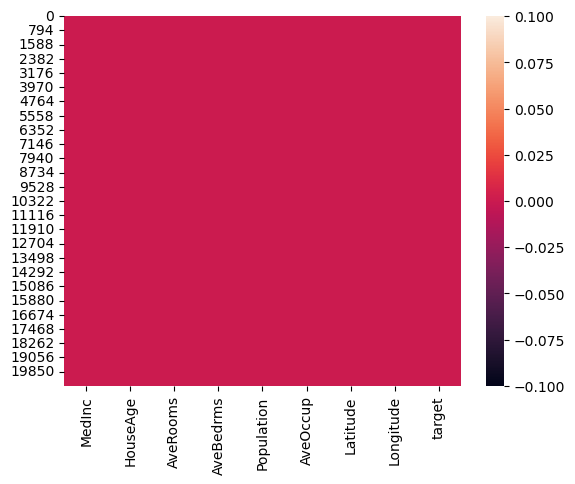

In [30]:
sns.heatmap(house.isnull())
# checking for null values using the seaborn libraries

In [31]:
house.describe()
# checking out the statistical details of the datasets

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [32]:
house.skew()
# Checking out for the skewness of the dataset

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

<Axes: >

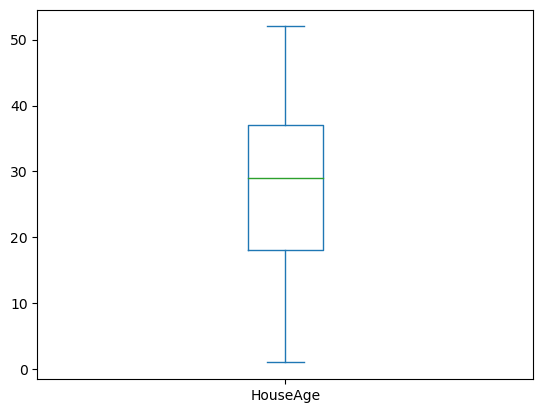

In [33]:
house['HouseAge'].plot.box()
# Using boxplot to look for the outliers using the HouseAge column

<Axes: >

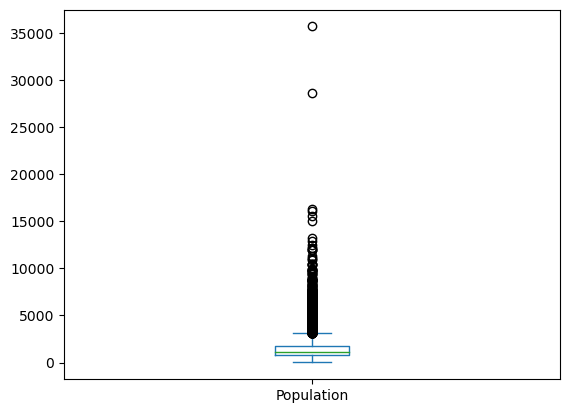

In [34]:
house['Population'].plot.box()
# Looking for outliers using the Population column

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(house))
z
# Using scipy.stats to remove outliers

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.344766,0.982143,0.628559,0.153758,0.974429,0.049597,1.052548,1.327835,2.129631
1,2.332238,0.607019,0.327041,0.263336,0.861439,0.092512,1.043185,1.322844,1.314156
2,1.782699,1.856182,1.155620,0.049016,0.820777,0.025843,1.038503,1.332827,1.258693
3,0.932968,1.856182,0.156966,0.049833,0.766028,0.050329,1.038503,1.337818,1.165100
4,0.012881,1.856182,0.344711,0.032906,0.759847,0.085616,1.038503,1.337818,1.172900
...,...,...,...,...,...,...,...,...,...
20635,1.216128,0.289187,0.155023,0.077354,0.512592,0.049110,1.801647,0.758826,1.115804
20636,0.691593,0.845393,0.276881,0.462365,0.944405,0.005021,1.806329,0.818722,1.124470
20637,1.142593,0.924851,0.090318,0.049414,0.369537,0.071735,1.778237,0.823713,0.992746
20638,1.054583,0.845393,0.040211,0.158778,0.604429,0.091225,1.778237,0.873626,1.058608


In [38]:
threshold=3
print(np.where(z>3))
# looking for rows which have values greater than 3, above 3 indicates the presence of outliers

(array([  131,   283,   409,   510,   511,   512,   514,   570,   576,
         710,   780,   799,   864,   865,   867,   869,   871,   922,
         923,   977,   985,   986,   995,  1010,  1021,  1024,  1024,
        1039,  1060,  1086,  1102,  1102,  1233,  1233,  1234,  1234,
        1235,  1235,  1238,  1238,  1239,  1239,  1240,  1240,  1541,
        1560,  1561,  1563,  1564,  1566,  1566,  1574,  1582,  1583,
        1586,  1591,  1593,  1602,  1617,  1621,  1636,  1637,  1642,
        1644,  1645,  1646,  1700,  1867,  1867,  1872,  1872,  1879,
        1889,  1889,  1910,  1910,  1911,  1911,  1912,  1912,  1913,
        1913,  1914,  1914,  1925,  1926,  1926,  1930,  1978,  1978,
        1979,  1979,  2025,  2119,  2213,  2294,  2311,  2392,  2392,
        2395,  2395,  2396,  2396,  2397,  2397,  2398,  2398,  2511,
        2511,  2776,  2826,  2963,  2969,  2975,  2978,  2999,  3004,
        3086,  3086,  3167,  3177,  3258,  3258,  3292,  3334,  3350,
        3350,  3364

In [44]:
house.skew()

MedInc         1.646657
HouseAge       0.060331
AveRooms      20.697869
AveBedrms     31.316956
Population     4.935858
AveOccup      97.639561
Latitude       0.465953
Longitude     -0.297801
target         0.977763
dtype: float64

<Axes: ylabel='Frequency'>

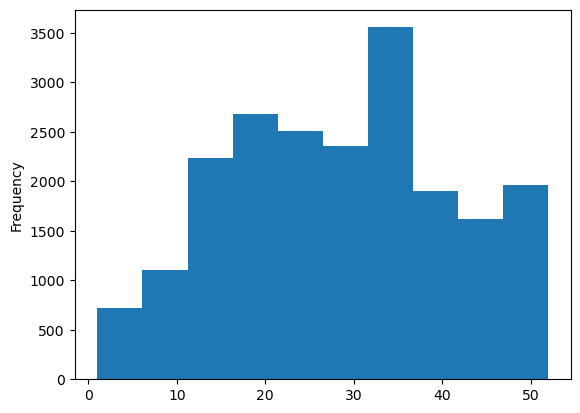

In [45]:
house['HouseAge'].plot.hist()

<Axes: ylabel='Frequency'>

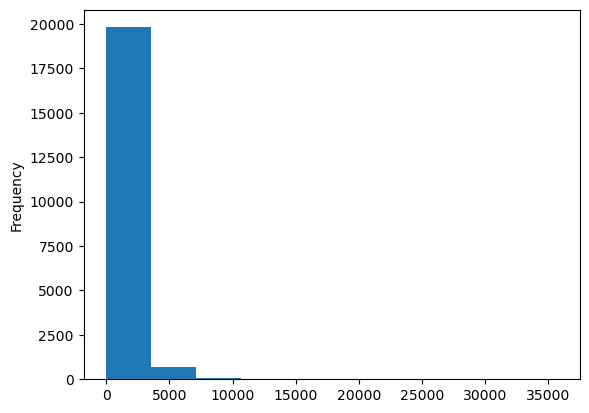

In [46]:
house['Population'].plot.hist()

<Axes: ylabel='Frequency'>

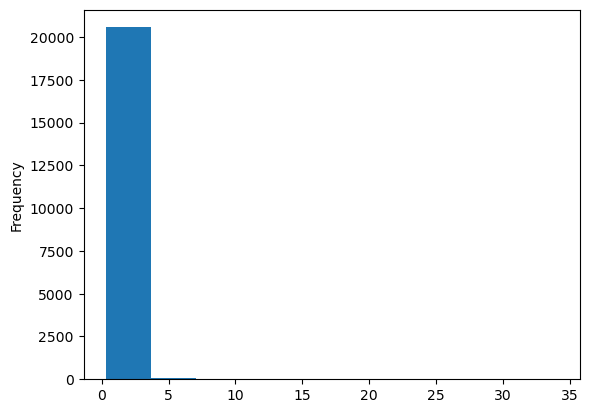

In [47]:
house['AveBedrms'].plot.hist()

<Axes: ylabel='Frequency'>

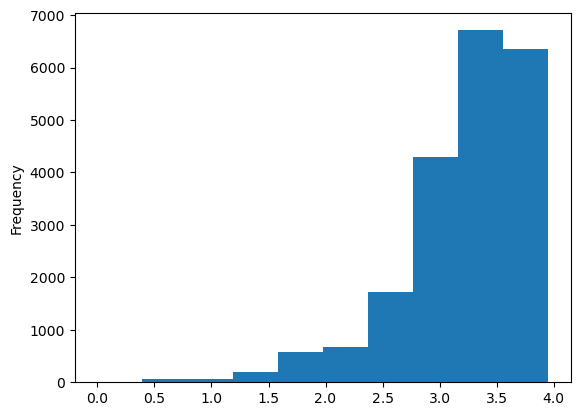

In [48]:
house['HouseAge']=np.log(house['HouseAge'])
house['HouseAge'].plot.hist()

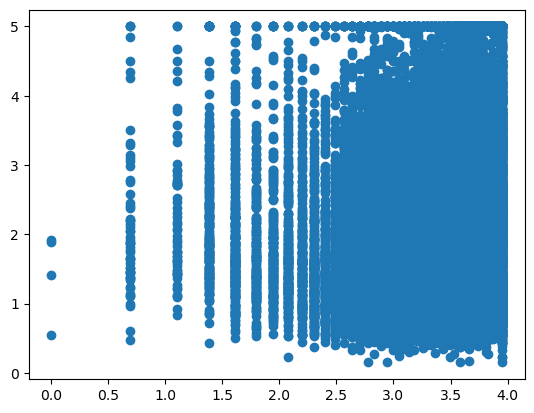

In [49]:
plt.scatter(house['HouseAge'],house['target'])
plt.show()

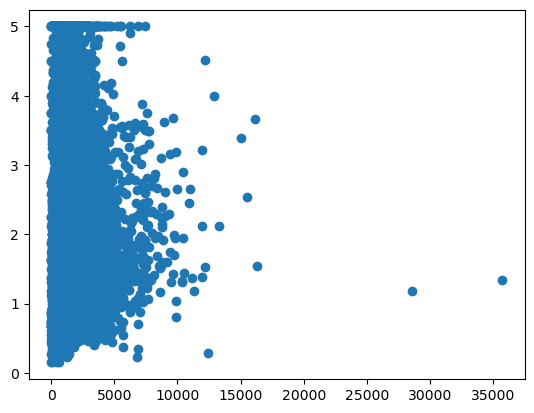

In [50]:
plt.scatter(house['Population'],house['target'])
plt.show()

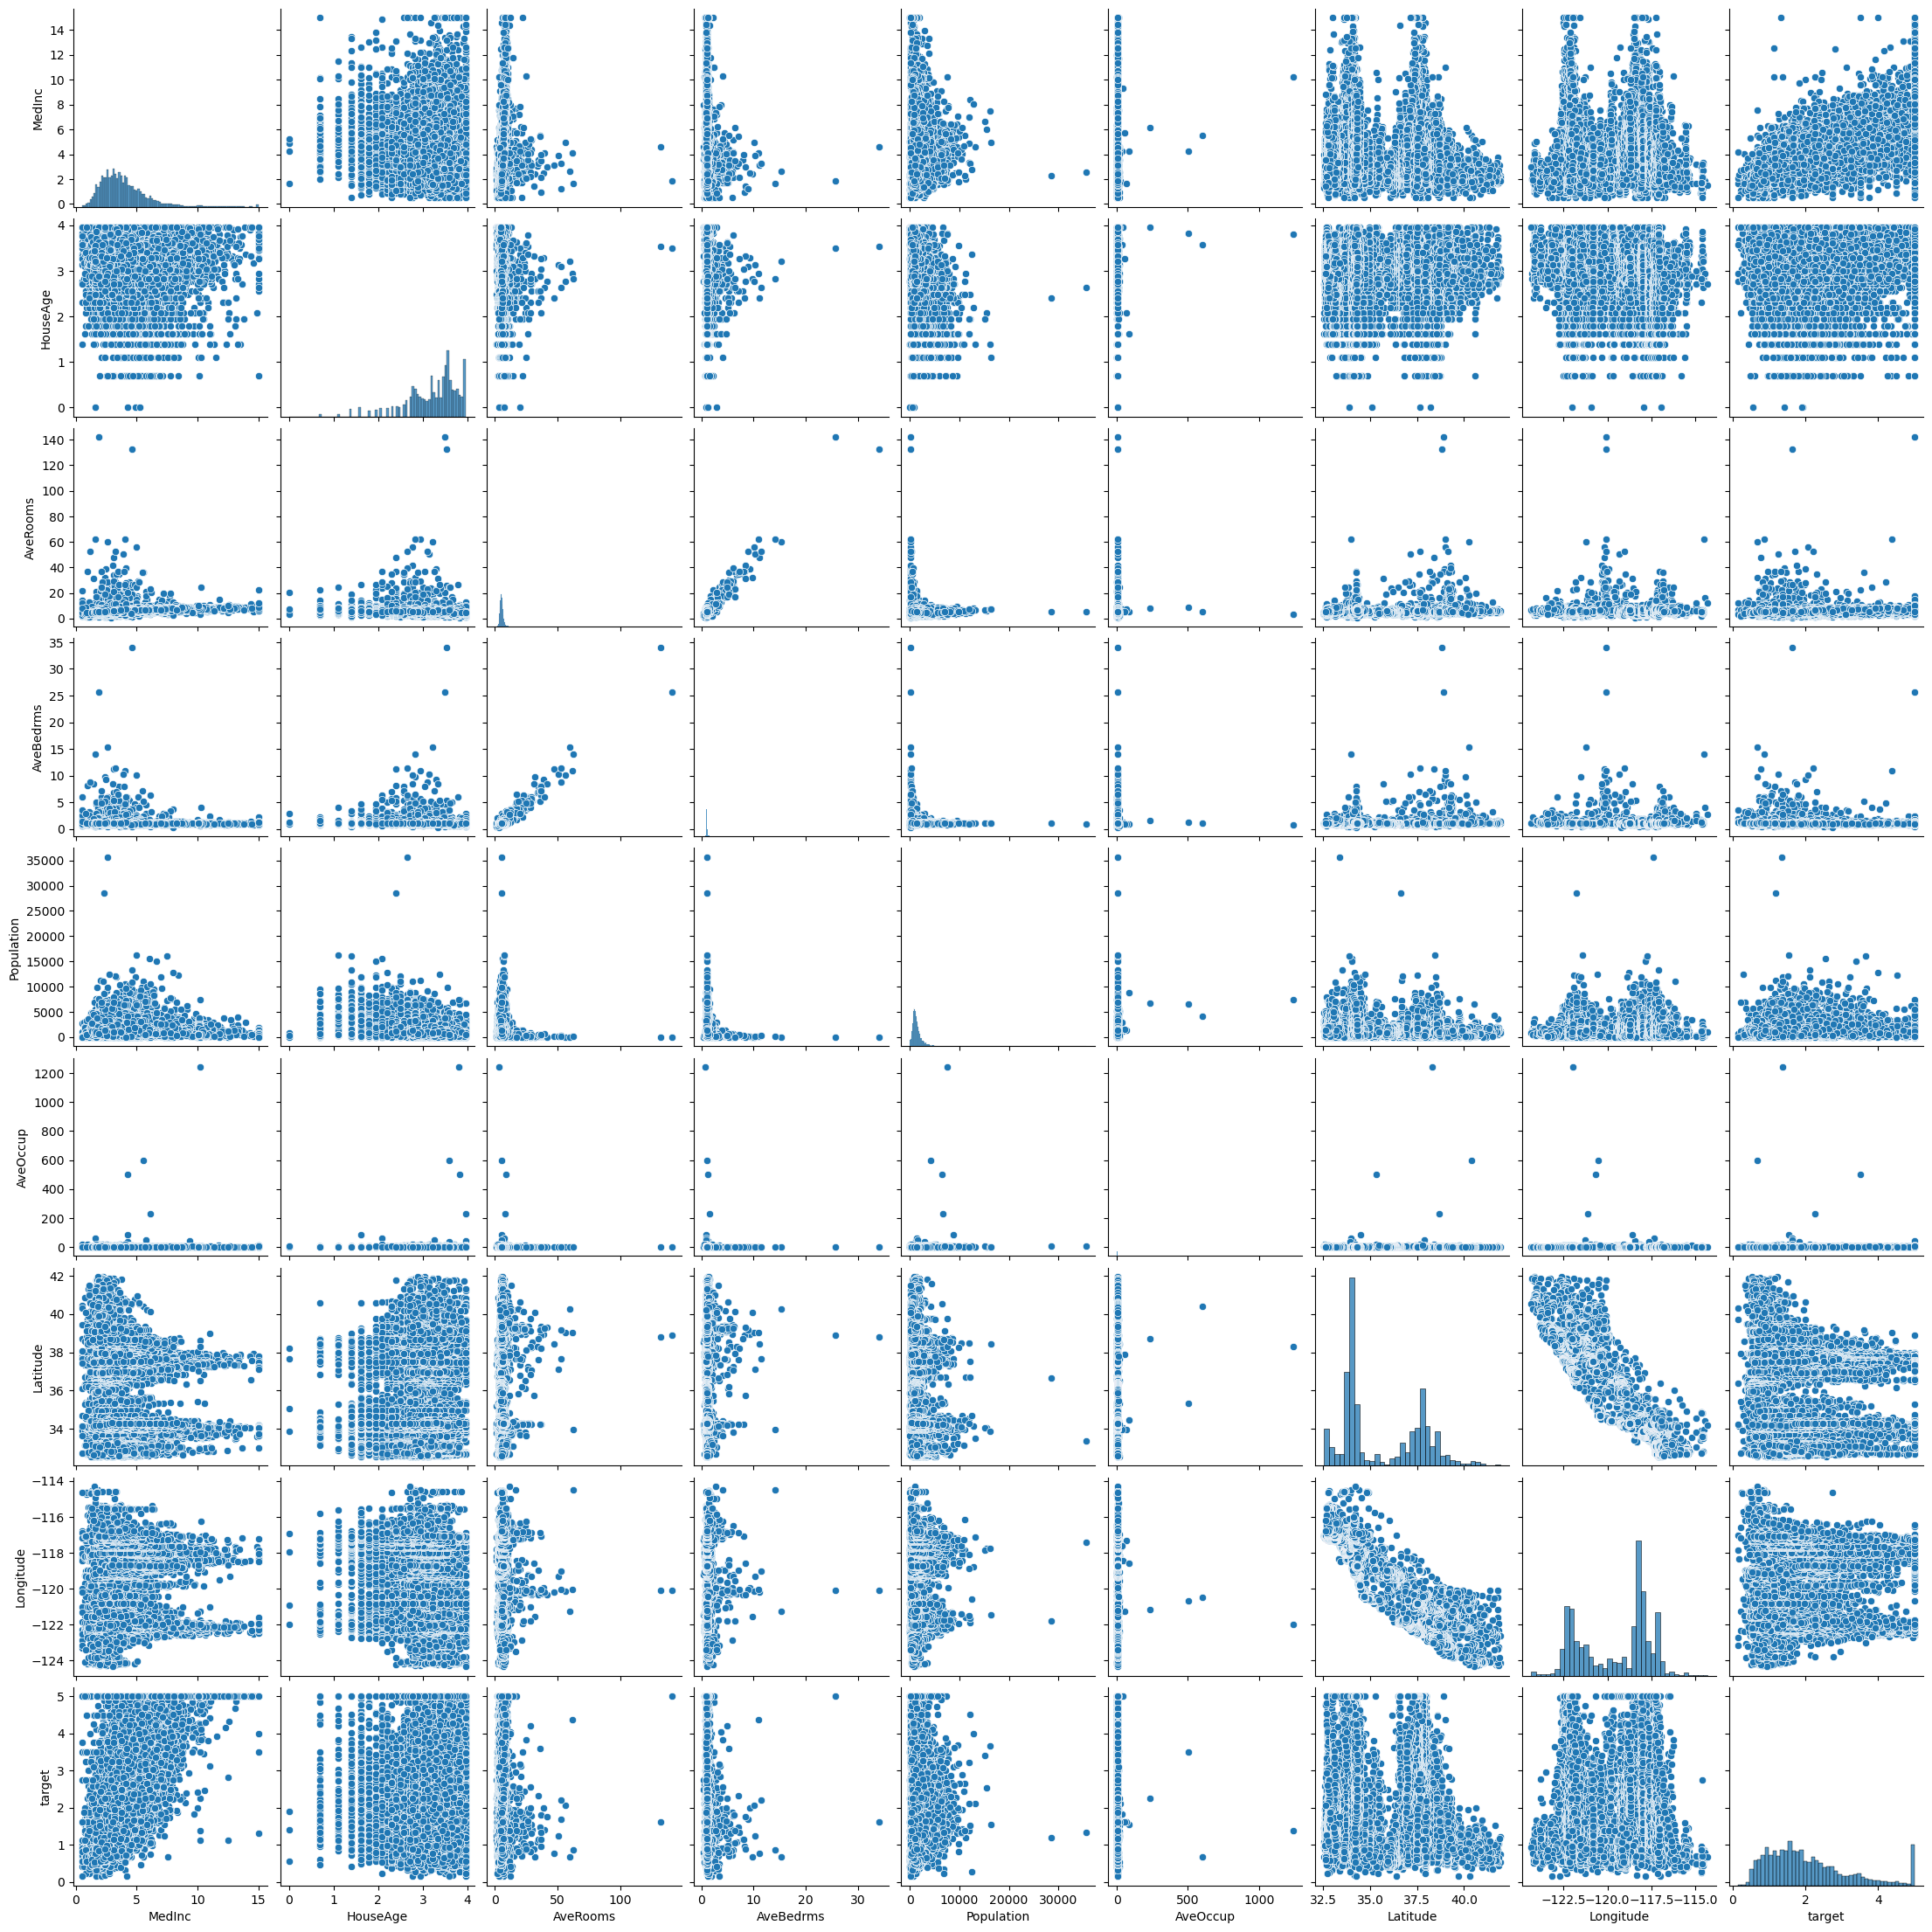

In [51]:
sns.pairplot(house)

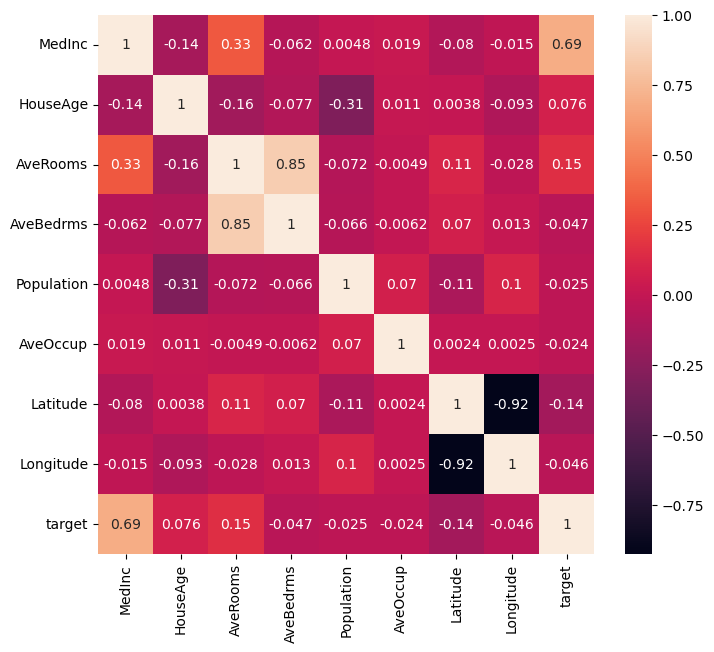

In [52]:
corr_house=house.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_house,annot=True)
plt.show()

In [54]:
house.drop('Latitude',axis=1,inplace=True)

In [55]:
house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,target
0,8.3252,3.713572,6.984127,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,3.044522,6.238137,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,3.951244,8.288136,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,3.951244,5.817352,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,3.951244,6.281853,1.081081,565.0,2.181467,-122.25,3.422


In [56]:
house_new=house[(z<3).all(axis=1)]

In [57]:
house_new

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude,target
0,8.3252,3.713572,6.984127,1.023810,322.0,2.555556,-122.23,4.526
1,8.3014,3.044522,6.238137,0.971880,2401.0,2.109842,-122.22,3.585
2,7.2574,3.951244,8.288136,1.073446,496.0,2.802260,-122.24,3.521
3,5.6431,3.951244,5.817352,1.073059,558.0,2.547945,-122.25,3.413
4,3.8462,3.951244,6.281853,1.081081,565.0,2.181467,-122.25,3.422
...,...,...,...,...,...,...,...,...
20635,1.5603,3.218876,5.045455,1.133333,845.0,2.560606,-121.09,0.781
20636,2.5568,2.890372,6.114035,1.315789,356.0,3.122807,-121.21,0.771
20637,1.7000,2.833213,5.205543,1.120092,1007.0,2.325635,-121.22,0.923
20638,1.8672,2.890372,5.329513,1.171920,741.0,2.123209,-121.32,0.847


In [58]:
house_new.shape

(19794, 8)

In [60]:
x=house_new.iloc[:,0:
                 -1]

In [62]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
0,8.3252,3.713572,6.984127,1.023810,322.0,2.555556,-122.23
1,8.3014,3.044522,6.238137,0.971880,2401.0,2.109842,-122.22
2,7.2574,3.951244,8.288136,1.073446,496.0,2.802260,-122.24
3,5.6431,3.951244,5.817352,1.073059,558.0,2.547945,-122.25
4,3.8462,3.951244,6.281853,1.081081,565.0,2.181467,-122.25


In [63]:
y=house_new.iloc[:,-1]

In [65]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: target, dtype: float64

In [66]:
y.shape

(19794,)

In [67]:
x.shape

(19794, 7)

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [72]:
x_train.shape

(13261, 7)

In [73]:
x_test.shape

(6533, 7)

In [74]:
y_train.shape

(13261,)

In [75]:
y_test.shape

(6533,)

In [76]:
lm=LinearRegression()

In [77]:
lm.fit(x_train,y_train)

LinearRegression()

In [78]:
lm.coef_

array([ 6.49093270e-01,  3.78692715e-01, -3.32296360e-01,  1.71598086e+00,
        5.21168520e-05, -2.50961654e-01, -1.28442155e-02])

In [80]:
lm.intercept_

-2.586758740897049

In [81]:
lm.score(x_train,y_train)

0.5746121836108319

In [85]:
pred=lm.predict(x_test)

In [83]:
pred

array([4.79363519, 1.2009701 , 1.79052774, ..., 2.72496239, 2.2240311 ,
       3.89203563])

In [87]:
print(y_test)

18042    5.00001
18723    1.51600
4161     1.52200
3808     2.02700
18038    5.00001
          ...   
4874     1.87500
20344    2.21700
12405    0.96700
15052    1.87200
888      4.42900
Name: target, Length: 6533, dtype: float64


In [88]:
print(mean_absolute_error(y_test,pred))

0.539024051031661


In [89]:
print(mean_squared_error(y_test,pred))

0.5476735990183546


In [90]:
print(np.sqrt(mean_squared_error(y_test,pred)))

0.7400497273956356


In [92]:
from sklearn.metrics import r2_score

In [93]:
print(r2_score(y_test,pred))

0.5603028613787784
